
<font color=red>
<h1 style="font-size:2em;color:#2467C0" >Sample work on NYC data preparation </h1>
<h3>- Identify the NYC Taxi Data</h3>
<h3>- Create a DataBase using SqLite</h3>
<h3>- Location Data</h3>
<h3>- Statistics</h3>
</font>

The yellow and green taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts. The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). The trip data was not created by the TLC, and TLC makes no representations as to the accuracy of these data.|

The For-Hire Vehicle (“FHV”) trip records include fields capturing the dispatching base license number and the pick-up date, time, and taxi zone location ID (shape file below). These records are generated from the FHV Trip Record submissions made by bases. Note: The TLC publishes base trip record data as submitted by the bases, and we cannot guarantee or confirm their accuracy or completeness. Therefore, this may not represent the total amount of trips dispatched by all TLC-licensed bases. The TLC performs routine reviews of the records and takes enforcement actions when necessary to ensure, to the extent possible, complete and accurate information.

For a dictionary describing green taxi data, or a map of the TLC Taxi Zones, please visit http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml.

<h2 style="font-size:2em;color:#2467C0">Yellow_Taxi_Data_2018 (Jan and Feb))</h2>

In this document, I will walk through the analysis of New York City Taxi Data (with download link shown in Section II) using Python. 2 months of “Yellow” label data will be loaded and analyzed.

The following libraries are the basic libraries for data analytics.



In [1]:
import pandas as pd
import numpy as np
import urllib.request
import zipfile
import random
import itertools
import math
import datetime as dt 

On the other hand, to visualize the information extracted from data, the libraries in below are also needed.

In [2]:
import shapefile
from shapely.geometry import Polygon
from descartes.patch import PolygonPatch
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

 Furthermore, to deal with the large scale of data (2.57 GB for 2 months in this case), a database is needed. Here I will use SQLAlchemy, which is a Python SQL toolkit and Object Relational Mapper that gives application developers the full power and flexibility of SQL.

In [3]:
from sqlalchemy import create_engine

nyc_database = create_engine('sqlite:///nyc_database.db')

The information and download links of NYC Taxi Data can be found in the link below:

http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml

Here we use Python code to download “Yellow” label data from 2018 January to 2018 February.

In [ ]:
# Download the Trip Record Data
for month in range(1,3):
    urllib.request.urlretrieve("https://s3.amazonaws.com/nyc-tlc/trip+data/"+ \
                               "yellow_tripdata_2018-{0:0=2d}.csv".format(month), 
                               "nyc.2018-{0:0=2d}.csv".format(month))

# Download the location Data
urllib.request.urlretrieve("https://s3.amazonaws.com/nyc-tlc/misc/taxi_zones.zip", "taxi_zones.zip")
with zipfile.ZipFile("taxi_zones.zip","r") as zip_ref:
    zip_ref.extractall("./shape")

In [2]:
df = pd.read_csv("nyc.2018-01.csv")
#df.tail(20)

In [3]:
df.head(100)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.50,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.70,1,N,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.80,1,N,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.20,1,N,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.50,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55
5,1,2018-01-01 00:29:29,2018-01-01 00:32:48,3,0.50,1,N,143,143,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80
6,1,2018-01-01 00:38:08,2018-01-01 00:48:24,2,1.70,1,N,50,239,1,9.0,0.5,0.5,2.05,0.0,0.3,12.35
7,1,2018-01-01 00:49:29,2018-01-01 00:51:53,1,0.70,1,N,239,238,1,4.0,0.5,0.5,1.00,0.0,0.3,6.30
8,1,2018-01-01 00:56:38,2018-01-01 01:01:05,1,1.00,1,N,238,24,1,5.5,0.5,0.5,1.70,0.0,0.3,8.50
9,1,2018-01-01 00:17:04,2018-01-01 00:22:24,1,0.70,1,N,170,170,2,5.5,0.5,0.5,0.00,0.0,0.3,6.80


In [5]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount'],
      dtype='object')

In [32]:
df.shape

(8759874, 17)

In [7]:
df.index

RangeIndex(start=0, stop=100, step=1)

In [35]:
df2 = pd.read_csv("nyc.2018-02.csv")


In [36]:
df2.shape

(8492076, 17)

<h1 style="font-size:2em;color:#2467C0">Create a DataBase</h1>


Now we load the trip record data into our database chunk by chunk.



In [4]:
# --------- Example Python Program for dropping an SQLite Table---------

#import sqlite3
#conn = sqlite3.connect('C:\\Users\\Bahman\\Traffic Data - LUH\\nyc_database.db')
#cursor = conn.cursor()
#cursor.execute("DROP TABLE table_record")
#conn.close()

This code showe the name of tables in database

In [5]:
# --------- Example Python Program for displaying SQLite Tables---------

import sqlite3
con = sqlite3.connect('C:\\Users\\Bahman\\Traffic Data - LUH\\nyc_database.db')
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())
con.close()

[('table_record',)]


In [13]:
j, chunksize = 1, 100000
for month in range(1,3):
    fp = "nyc.2018-{0:0=2d}.csv".format(month)
    for df in pd.read_csv(fp, chunksize=chunksize, iterator=True):
        df = df.rename(columns={c: c.replace(' ', '_') for c in df.columns})
        df['pickup_hour'] = [x[11:13] for x in df['tpep_pickup_datetime']]
        df['dropoff_hour'] = [x[11:13] for x in df['tpep_dropoff_datetime']]
        df['pickup_weekday'] =  pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce').dt.weekday_name
        df.index += j
        df.to_sql('table_record', nyc_database, if_exists='append')
        j = df.index[-1] + 1
del df

This will tell you how many rows your database has.



In [40]:
import sqlite3
conn = sqlite3.connect('nyc_database.db')
cursor = conn.cursor()
cursor.execute("select * from table_record")
results = cursor.fetchall()
conn.commit()
conn.close()

In [41]:
len(results)


17251950

In [21]:
xx= pd.read_sql_query('SELECT * FROM table_record \
                        ORDER BY tpep_pickup_datetime ASC LIMIT 1000', nyc_database)


In [22]:
xx

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_hour,dropoff_hour,pickup_weekday
0,7700702,2,2001-01-05 11:45:23,2001-01-05 11:52:05,5,1.53,1,N,71,89,...,7.5,0.5,0.5,0.00,0.00,0.3,8.80,11,11,Friday
1,77931732,2,2002-12-31 23:01:55,2003-01-01 14:59:11,5,0.89,1,N,264,264,...,5.5,0.0,0.5,1.26,0.00,0.3,7.56,23,14,Tuesday
2,137792590,2,2002-12-31 23:02:29,2003-01-01 22:52:09,4,1.97,1,N,79,162,...,9.0,0.5,0.5,0.00,0.00,0.3,10.30,23,22,Tuesday
3,1490534,2,2002-12-31 23:03:13,2003-01-01 06:36:55,1,0.41,1,N,48,68,...,3.5,0.0,0.5,0.00,0.00,0.3,4.30,23,06,Tuesday
4,559849,2,2002-12-31 23:16:43,2002-12-31 23:25:59,3,1.96,1,N,166,238,...,8.0,0.0,0.5,0.00,0.00,0.3,8.80,23,23,Tuesday
5,62997582,2,2002-12-31 23:47:02,2002-12-31 23:58:03,1,2.82,1,N,79,229,...,11.5,0.0,0.5,0.00,0.00,0.3,12.30,23,23,Tuesday
6,137750215,2,2003-01-01 00:06:34,2003-01-01 19:52:26,1,12.07,1,N,138,106,...,39.0,1.0,0.5,8.16,0.00,0.3,48.96,00,19,Wednesday
7,11972348,2,2003-01-01 00:25:20,2003-01-01 00:59:32,1,10.41,1,N,137,138,...,34.5,0.0,0.5,0.00,0.00,0.3,35.30,00,00,Wednesday
8,62997583,2,2003-01-01 00:31:27,2003-01-01 00:42:57,1,3.44,1,N,43,166,...,12.0,0.0,0.5,0.00,0.00,0.3,12.80,00,00,Wednesday
9,66507422,2,2003-01-01 01:12:28,2003-01-01 01:24:14,1,1.92,1,N,48,238,...,9.0,0.0,0.5,0.00,0.00,0.3,9.80,01,01,Wednesday


Below there are some useful functions that we use during this notebook.

In [4]:
def diff_short_long_trip_on_time():
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,18))

    ax = plt.subplot(2,2,1, polar=True)
    # make the histogram that bined on 24 hour
    radii = np.array(df_q3_PU['short trips'].tolist(), dtype="int64")
    title = "Pickup Time for Short Trips"
    plt_clock(ax, radii, title, "#dc143c")

    ax = plt.subplot(2,2,2, polar=True)
    # make the histogram that bined on 24 hour
    radii = np.array(df_q3_PU['long trips'].tolist(), dtype="int64")
    title = "Pickup Time for Long Trips"
    plt_clock(ax, radii, title, "#56B4E9")

    ax = plt.subplot(2,2,3, polar=True)
    # make the histogram that bined on 24 hour
    radii = np.array(df_q3_DO['short trips'].tolist(), dtype="int64")
    title = "Dropoff Time for Short Trips"
    plt_clock(ax, radii, title, "#dc143c")

    ax = plt.subplot(2,2,4, polar=True)
    # make the histogram that bined on 24 hour
    radii = np.array(df_q3_DO['long trips'].tolist(), dtype="int64")
    title = "Dropoff Time for Long Trips"
    plt_clock(ax, radii, title, "#56B4E9")

In [5]:
def plt_clock(ax, radii, title, color):
    N = 24
    bottom = 2

    # create theta for 24 hours
    theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)


    # width of each bin on the plot
    width = (2*np.pi) / N
    
    bars = ax.bar(theta, radii, width=width, bottom=bottom, color=color, edgecolor="#999999")

    # set the lable go clockwise and start from the top
    ax.set_theta_zero_location("N")
    # clockwise
    ax.set_theta_direction(-1)

    # set the label
    ax.set_xticks(theta)
    ticks = ["{}:00".format(x) for x in range(24)]
    ax.set_xticklabels(ticks)
    ax.set_title(title)

In [6]:
def diff_short_long_trip_on(attr, rpr="count", kind='bar'):
    df_q3_short = pd.read_sql_query('SELECT '+attr+', count(*) as count \
                                    FROM table_record \
                                    WHERE trip_distance < 30 \
                                    GROUP BY '+attr, nyc_database)
    df_q3_long = pd.read_sql_query('SELECT '+attr+', avg(trip_distance) AS AVG_trip_distance, count(*) as count \
                                    FROM table_record \
                                    WHERE trip_distance >= 30 \
                                    GROUP BY '+attr, nyc_database)
    if rpr == "proportion":
        s = np.sum(df_q3_short['count'].values)
        df_q3_short['proportion'] = [float(x)/s for x in df_q3_short['count']]
        s = np.sum(df_q3_long['count'].values)
        df_q3_long['proportion'] = [float(x)/s for x in df_q3_long['count']]
    
    df_q3 = df_q3_short.merge(df_q3_long, on=attr, suffixes=["_short", "_long"]) \
                        .rename(columns={rpr+"_short":"short trips", rpr+"_long":"long trips"}) 
    ax = df_q3.plot(x=attr, y=['short trips', 'long trips'], kind=kind, figsize=(15,5))
    ax.set_ylabel(rpr)
    ax.set_title(attr.replace("_", " ")+" difference in short/long trip")

In [7]:
def get_lat_lon(sf):
    content = []
    for sr in sf.shapeRecords():
        shape = sr.shape
        rec = sr.record
        loc_id = rec[shp_dic['LocationID']]
        
        x = (shape.bbox[0]+shape.bbox[2])/2
        y = (shape.bbox[1]+shape.bbox[3])/2
        
        content.append((loc_id, x, y))
    return pd.DataFrame(content, columns=["LocationID", "longitude", "latitude"])

In [8]:
def get_boundaries(sf):
    lat, lon = [], []
    for shape in list(sf.iterShapes()):
        lat.extend([shape.bbox[0], shape.bbox[2]])
        lon.extend([shape.bbox[1], shape.bbox[3]])

    margin = 0.01 # buffer to add to the range
    lat_min = min(lat) - margin
    lat_max = max(lat) + margin
    lon_min = min(lon) - margin
    lon_max = max(lon) + margin

    return lat_min, lat_max, lon_min, lon_max

In [9]:
def draw_region_map(ax, sf, heat={}):
    continent = [235/256, 151/256, 78/256]
    ocean = (89/256, 171/256, 227/256)    
    
    reg_list={'Staten Island':1, 'Queens':2, 'Bronx':3, 'Manhattan':4, 'EWR':5, 'Brooklyn':6}
    reg_x = {'Staten Island':[], 'Queens':[], 'Bronx':[], 'Manhattan':[], 'EWR':[], 'Brooklyn':[]}
    reg_y = {'Staten Island':[], 'Queens':[], 'Bronx':[], 'Manhattan':[], 'EWR':[], 'Brooklyn':[]}
    
    # colorbar
    if len(heat) != 0:
        norm = mpl.colors.Normalize(vmin=math.sqrt(min(heat.values())), vmax=math.sqrt(max(heat.values()))) #norm = mpl.colors.LogNorm(vmin=1,vmax=max(heat))
        cm=plt.get_cmap('Reds')
        #sm = plt.cm.ScalarMappable(cmap=cm, norm=norm)
        #sm.set_array([])
        #plt.colorbar(sm, ticks=np.linspace(min(heat.values()),max(heat.values()),8), \
        #             boundaries=np.arange(min(heat.values())-10,max(heat.values())+10,.1))
    
    ax.set_facecolor(ocean)
    for sr in sf.shapeRecords():
        shape = sr.shape
        rec = sr.record
        reg_name = rec[shp_dic['borough']]
        
        if len(heat) == 0:
            norm = mpl.colors.Normalize(vmin=1,vmax=6) #norm = mpl.colors.LogNorm(vmin=1,vmax=max(heat))
            cm=plt.get_cmap('Pastel1')
            R,G,B,A = cm(norm(reg_list[reg_name]))
            col = [R,G,B]
        else:
            R,G,B,A = cm(norm(math.sqrt(heat[reg_name])))
            col = [R,G,B]
            
        # check number of parts (could use MultiPolygon class of shapely?)
        nparts = len(shape.parts) # total parts
        if nparts == 1:
            polygon = Polygon(shape.points)
            patch = PolygonPatch(polygon, facecolor=col, alpha=1.0, zorder=2)
            ax.add_patch(patch)
        else: # loop over parts of each shape, plot separately
            for ip in range(nparts): # loop over parts, plot separately
                i0 = shape.parts[ip]
                if ip < nparts-1:
                    i1 = shape.parts[ip+1]-1
                else:
                    i1 = len(shape.points)

                polygon = Polygon(shape.points[i0:i1+1])
                patch = PolygonPatch(polygon, facecolor=col, alpha=1.0, zorder=2)
                ax.add_patch(patch)
                
        reg_x[reg_name].append((shape.bbox[0]+shape.bbox[2])/2)
        reg_y[reg_name].append((shape.bbox[1]+shape.bbox[3])/2)
        
    for k in reg_list:
        if len(heat)==0:
            plt.text(np.mean(reg_x[k]), np.mean(reg_y[k]), k, horizontalalignment='center', verticalalignment='center',
                        bbox=dict(facecolor='black', alpha=0.5), color="white", fontsize=12)     
        else:
            plt.text(np.mean(reg_x[k]), np.mean(reg_y[k]), "{}\n({}K)".format(k, heat[k]/1000), horizontalalignment='center', 
                     verticalalignment='center',bbox=dict(facecolor='black', alpha=0.5), color="white", fontsize=12)       

    # display
    limits = get_boundaries(sf)
    plt.xlim(limits[0], limits[1])
    plt.ylim(limits[2], limits[3])

In [10]:
def draw_zone_map(ax, sf, heat={}, text=[], arrows=[]):
    continent = [235/256, 151/256, 78/256]
    ocean = (89/256, 171/256, 227/256)
    theta = np.linspace(0, 2*np.pi, len(text)+1).tolist()
    ax.set_facecolor(ocean)
    
    # colorbar
    if len(heat) != 0:
        norm = mpl.colors.Normalize(vmin=min(heat.values()),vmax=max(heat.values())) #norm = mpl.colors.LogNorm(vmin=1,vmax=max(heat))
        cm=plt.get_cmap('Reds')
        sm = plt.cm.ScalarMappable(cmap=cm, norm=norm)
        sm.set_array([])
        plt.colorbar(sm, ticks=np.linspace(min(heat.values()),max(heat.values()),8),
                     boundaries=np.arange(min(heat.values())-10,max(heat.values())+10,.1))
    
    for sr in sf.shapeRecords():
        shape = sr.shape
        rec = sr.record
        loc_id = rec[shp_dic['LocationID']]
        zone = rec[shp_dic['zone']]
        
        if len(heat) == 0:
            col = continent
        else:
            if loc_id not in heat:
                R,G,B,A = cm(norm(0))
            else:
                R,G,B,A = cm(norm(heat[loc_id]))
            col = [R,G,B]

        # check number of parts (could use MultiPolygon class of shapely?)
        nparts = len(shape.parts) # total parts
        if nparts == 1:
            polygon = Polygon(shape.points)
            patch = PolygonPatch(polygon, facecolor=col, alpha=1.0, zorder=2)
            ax.add_patch(patch)
        else: # loop over parts of each shape, plot separately
            for ip in range(nparts): # loop over parts, plot separately
                i0 = shape.parts[ip]
                if ip < nparts-1:
                    i1 = shape.parts[ip+1]-1
                else:
                    i1 = len(shape.points)

                polygon = Polygon(shape.points[i0:i1+1])
                patch = PolygonPatch(polygon, facecolor=col, alpha=1.0, zorder=2)
                ax.add_patch(patch)
        
        x = (shape.bbox[0]+shape.bbox[2])/2
        y = (shape.bbox[1]+shape.bbox[3])/2
        if (len(text) == 0 and rec[shp_dic['Shape_Area']] > 0.0001):
            plt.text(x, y, str(loc_id), horizontalalignment='center', verticalalignment='center')            
        elif len(text) != 0 and loc_id in text:
            #plt.text(x+0.01, y-0.01, str(loc_id), fontsize=12, color="white", bbox=dict(facecolor='black', alpha=0.5))
            eta_x = 0.05*np.cos(theta[text.index(loc_id)])
            eta_y = 0.05*np.sin(theta[text.index(loc_id)])
            ax.annotate("[{}] {}".format(loc_id, zone), xy=(x, y), xytext=(x+eta_x, y+eta_y),
                        bbox=dict(facecolor='black', alpha=0.5), color="white", fontsize=12,
                        arrowprops=dict(facecolor='black', width=3, shrink=0.05))
    if len(arrows)!=0:
        for arr in arrows:
            ax.annotate('', xy = arr['dest'], xytext = arr['src'], size = arr['cnt'],
                    arrowprops=dict(arrowstyle="fancy", fc="0.6", ec="none"))
    
    # display
    limits = get_boundaries(sf)
    plt.xlim(limits[0], limits[1])
    plt.ylim(limits[2], limits[3])

<h1 style="font-size:2em;color:#2467C0">Location Data</h1>


In [14]:
sf = shapefile.Reader("shape/taxi_zones.shp")
fields_name = [field[0] for field in sf.fields[1:]]
shp_dic = dict(zip(fields_name, list(range(len(fields_name)))))
attributes = sf.records()
shp_attr = [dict(zip(fields_name, attr)) for attr in attributes]

df_loc = pd.DataFrame(shp_attr).join(get_lat_lon(sf).set_index("LocationID"), on="LocationID")
df_loc.head()

,LocationID,OBJECTID,Shape_Area,Shape_Leng,borough,zone,longitude,latitude
0,1,1,0.000782,0.116357,EWR,Newark Airport,9.366817e+05,190522.130278
1,2,2,0.004866,0.433470,Queens,Jamaica Bay,1.033536e+06,161853.982300
2,3,3,0.000314,0.084341,Bronx,Allerton/Pelham Gardens,1.027136e+06,254730.010849
3,4,4,0.000112,0.043567,Manhattan,Alphabet City,9.904240e+05,203100.040432
4,5,5,0.000498,0.092146,Staten Island,Arden Heights,9.321332e+05,139954.541936


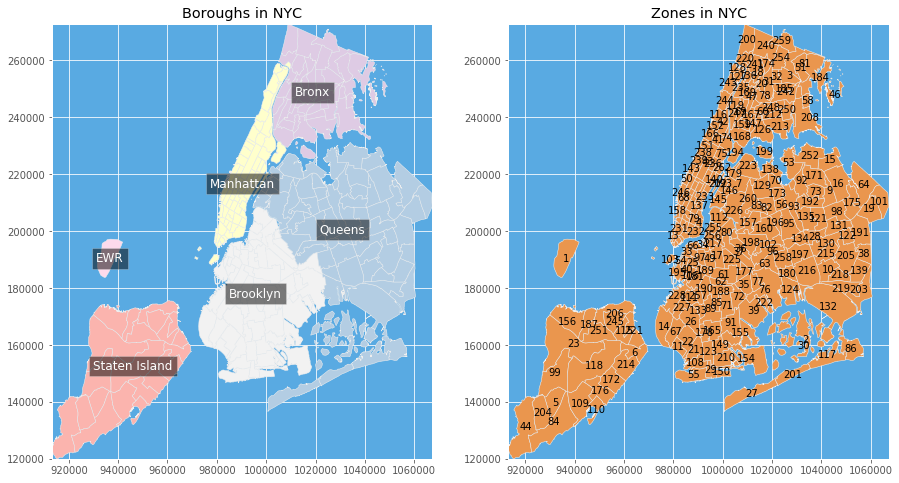

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
ax = plt.subplot(1, 2, 1)
ax.set_title("Boroughs in NYC")
draw_region_map(ax, sf)
ax = plt.subplot(1, 2, 2)
ax.set_title("Zones in NYC")
draw_zone_map(ax, sf)

<h1 style="font-size:2em;color:#2467C0">Statistics</h1>

In the following 3 Analytic Problems, I will show my analytic results and graph visualizations along with the Python code that generates the plots.

<p style="font-size:2em; font-size:1.5em;color:black; font-style:bold">Part 1: Which regions have most pickups and drop-offs?
 (Yellow_2018_1 and Yellow_2018_2 )</p>



In the beginning, we select the data we need (location of pickup/dropoff ans their counts) from the databse.



In [21]:
df_pu = pd.read_sql_query('SELECT PULocationID AS LocationID, count(*) AS PUcount \
                        FROM table_record \
                        GROUP BY PULocationID', nyc_database)
df_do = pd.read_sql_query('SELECT DOLocationID AS LocationID, count(*) AS DOcount \
                        FROM table_record \
                        GROUP BY DOLocationID', nyc_database)

With the selected data, we want to obtain the zones with most pickups and drop-offs.



In [22]:
df_pu.head(2)

,LocationID,PUcount
0,1,1068
1,2,10


In [29]:
df_do.head(2)

,LocationID,DOcount
0,1,27683
1,2,10


In [30]:
df_loc.head(2)

,LocationID,OBJECTID,Shape_Area,Shape_Leng,borough,zone,longitude,latitude
0,1,1,0.000782,0.116357,EWR,Newark Airport,9.366817e+05,190522.130278
1,2,2,0.004866,0.433470,Queens,Jamaica Bay,1.033536e+06,161853.982300


In [31]:
template = pd.DataFrame([x for x in range(1,max(df_loc['LocationID'].tolist()))], columns=["LocationID"])
df_q1 = pd.concat([df_pu, df_do]).join(template.set_index("LocationID"), how = 'outer', on=["LocationID"]).fillna(0) \
                                    .groupby(["LocationID"], as_index=False) \
                                    .agg({'PUcount': 'sum', 'DOcount': 'sum'})\
                                    .sort_values(by=['LocationID'])
df_q1['TOTALcount'] = df_q1['PUcount'] + df_q1['DOcount']
loc = df_loc[["LocationID", "zone", "borough"]]
df_q1 = df_q1.merge(loc, left_on="LocationID", right_on="LocationID")


PUcount = dict(zip(df_q1['LocationID'].tolist(), df_q1['PUcount'].tolist()))
PUtop3 = df_q1.sort_values(by=['PUcount'], ascending=False).set_index("LocationID").head(3)

DOcount = dict(zip(df_q1['LocationID'].tolist(), df_q1['DOcount'].tolist()))
DOtop3 = df_q1.sort_values(by=['DOcount'], ascending=False).set_index("LocationID").head(3)

In the tables below, we can see that in Jan and Feb 2018,

the top 3 pickup zones are Upper East Side South, Midtown Center, and Upper East Side North, which are all in Manhattan.
the top 3 drop-off zones are also Upper East Side South, Midtown Center, and Upper East Side North.

In [32]:
PUtop3

,PUcount,DOcount,TOTALcount,zone,borough
LocationID,,,,,
237,705666.0,621461.0,1327127.0,Upper East Side South,Manhattan
161,695288.0,656203.0,1351491.0,Midtown Center,Manhattan
236,669088.0,697368.0,1366456.0,Upper East Side North,Manhattan


In [34]:
DOtop3

,PUcount,DOcount,TOTALcount,zone,borough
LocationID,,,,,
236,669088.0,697368.0,1366456.0,Upper East Side North,Manhattan
161,695288.0,656203.0,1351491.0,Midtown Center,Manhattan
237,705666.0,621461.0,1327127.0,Upper East Side South,Manhattan


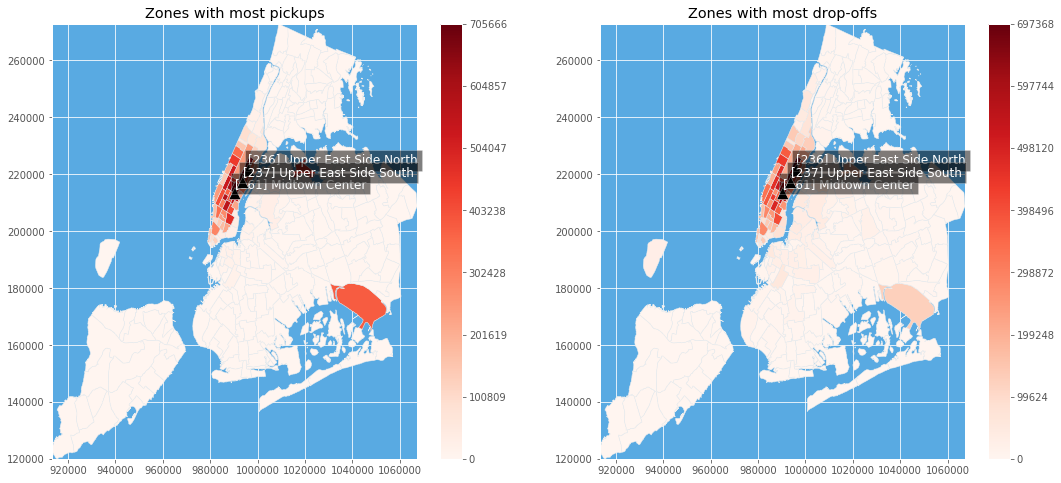

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
ax = plt.subplot(1, 2, 1)
ax.set_title("Zones with most pickups")
draw_zone_map(ax, sf, heat=PUcount, text=PUtop3.index.tolist())
ax = plt.subplot(1, 2, 2)
ax.set_title("Zones with most drop-offs")
draw_zone_map(ax, sf, heat=DOcount, text=DOtop3.index.tolist())

Note that in the figure above, we can see that despite the top 3 pickup/dropoff zones, many other zones in Manhattan are also popular. By the way, the zone in the lower-right part of the map, which is JFK Airport, is the most popular pickup/dropoff zone in New York City excluding zones in Manhattan.

Next, we investigate boroughs with most pickups and drop-offs. In the tables below, we can see that Manhattan is obviously the most popular borough and Staten Island is the least popular borough. Queens and Brooklyn are also popular, although their pickup/droppoff count is less than 10% of Manhattan’s.

In [36]:
df_q1_region = df_q1.groupby(["borough"], as_index=False) \
                    .agg({'PUcount': 'sum', 'DOcount': 'sum', 'TOTALcount': 'sum'}) \
                    .sort_values(by=['TOTALcount'], ascending=False)
df_q1_region

,borough,PUcount,DOcount,TOTALcount
3,Manhattan,15733570.0,15355272.0,31088842.0
4,Queens,1013047.0,781318.0,1794365.0
1,Brooklyn,195351.0,698384.0,893735.0
0,Bronx,13955.0,98900.0,112855.0
2,EWR,1068.0,27683.0,28751.0
5,Staten Island,252.0,3368.0,3620.0


In [52]:
PUcount = dict(zip(df_q1_region['borough'].tolist(), df_q1_region['PUcount'].tolist()))
DOcount = dict(zip(df_q1_region['borough'].tolist(), df_q1_region['DOcount'].tolist()))

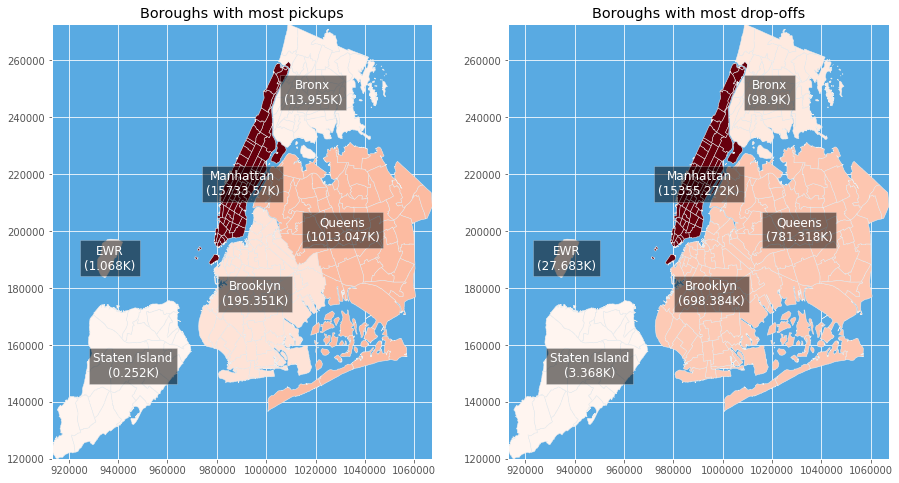

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
ax = plt.subplot(1, 2, 1)
ax.set_title("Boroughs with most pickups")
draw_region_map(ax, sf, heat = PUcount)
ax = plt.subplot(1, 2, 2)
ax.set_title("Boroughs with most drop-offs")
draw_region_map(ax, sf, heat = DOcount)

In the figure above, it is noticed that in Jan and Feb 2018, there are more pickups in Queens than in Brooklyn while there are similar number of drop-offs in both Queens and Brooklyn.

<p style="font-size:2em; font-size:1.5em;color:black; font-style:bold">Part 2: The peak hours and off-peak hours for taking taxi</p>

Again we start from selecting data needed from the database.

In [54]:
df_pu = pd.read_sql_query('SELECT pickup_hour AS time, count(*) AS PUcount \
                        FROM table_record \
                        GROUP BY pickup_hour', nyc_database)

In [55]:
df_do = pd.read_sql_query('SELECT dropoff_hour AS time, count(*) AS DOcount \
                        FROM table_record \
                        GROUP BY dropoff_hour', nyc_database)

In [66]:
df_q2 = df_pu.merge(df_do, on="time")

From the selected data, we arrange and show the visualization of the information we need.



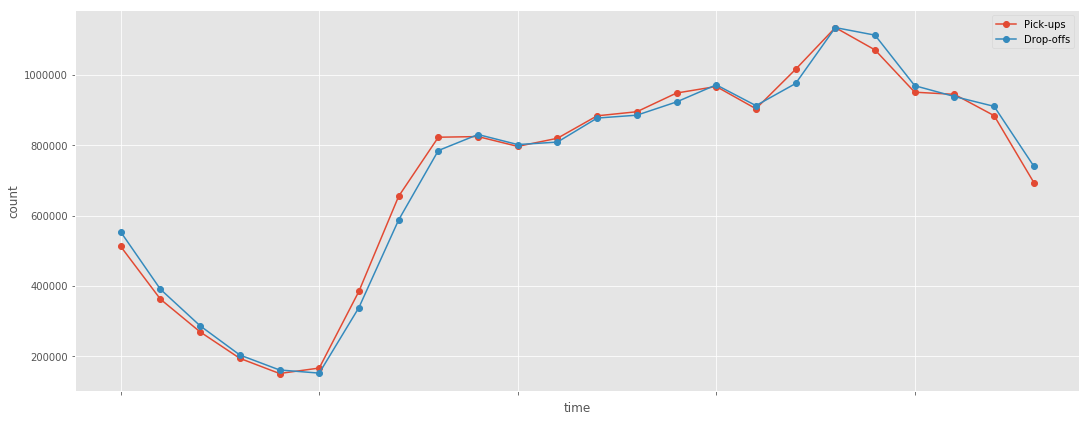

In [65]:
template = pd.DataFrame(["{0:0=2d}".format(x) for x in range(0,24)], columns=["time"])
df_q2 = df_q2.join(template.set_index("time"), how = 'outer', on=["time"]).fillna(0) \
                .groupby(["time"], as_index=False) \
                .agg({'PUcount': 'sum', 'DOcount': 'sum'}) \
                .rename(columns = {'PUcount':'Pick-ups', 'DOcount': 'Drop-offs'}) \
                .sort_values(by='time')

ax = df_q2.plot(x='time', y=['Pick-ups', 'Drop-offs'], kind='line', style="-o", figsize=(18,7))
ax.set_ylabel("count")
plt.show()

In [68]:
df_q2

,time,Pick-ups,Drop-offs
0,00,512158,553524
1,01,362338,390526
2,02,269312,286624
3,03,194155,203644
4,04,151030,161074
5,05,166512,152116
6,06,384780,338606
7,07,654749,587560
8,08,822787,784920
9,09,824627,830486


As you can see, according to the NYC Taxi records from 2018 January to 2018 February, it is found that:

The peak hours are around 6PM ~ 7PM.

The off-peak hours are around 5AM.

<p style="font-size:2em; font-size:1.5em;color:black; font-style:bold">Part 3: Number of passengers in each trip</p>

In [141]:
df_passenger_count = pd.read_sql_query('SELECT passenger_count, count(*) AS number_of_trips\
                        FROM table_record \
                        GROUP BY passenger_count', nyc_database)

In [142]:
df_passenger_count

,passenger_count,number_of_trips
0,0,116254
1,1,12330230
2,2,2504561
3,3,690638
4,4,318425
5,5,805286
6,6,486404
7,7,68
8,8,42
9,9,41


In [143]:
df_passenger_count_max_6_passengers=df_passenger_count.head(7)
df_passenger_count_max_6_passengers

,passenger_count,number_of_trips
0,0,116254
1,1,12330230
2,2,2504561
3,3,690638
4,4,318425
5,5,805286
6,6,486404


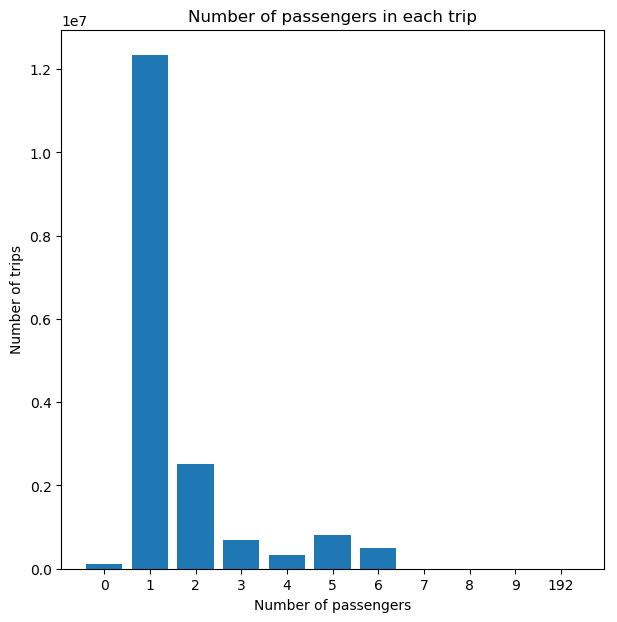

In [146]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
objects = df_passenger_count['passenger_count']
y_pos = np.arange(len(objects))
performance = df_passenger_count['number_of_trips']
 
plt.bar(y_pos, performance, align='center', alpha=1.0)
plt.xticks(y_pos, objects)
plt.ylabel('Number of trips')
plt.xlabel('Number of passengers')

plt.title('Number of passengers in each trip')
 
plt.show()

<p style="font-size:2em; font-size:1.5em;color:black; font-style:bold">Part 3: Data Cleaning and Handling Missing Data</p>


Trips with zero price or zero distance can be considered as canceled trips, which are a kind of outlier, so we can drop coresponded record from dataset.

In [72]:
df_zero_distance = pd.read_sql_query('SELECT *\
                        FROM table_record \
                        WHERE trip_distance==0', nyc_database)

In [73]:
df_zero_distance.shape

(107618, 21)

In [75]:
df_zero_total_amount = pd.read_sql_query('SELECT *\
                        FROM table_record \
                        WHERE total_amount==0', nyc_database)

In [76]:
df_zero_total_amount.shape

(2204, 21)

In [71]:
df_zero_time_trip = pd.read_sql_query('SELECT *\
                        FROM table_record \
                        WHERE tpep_pickup_datetime==tpep_dropoff_datetime', nyc_database)

In [72]:
df_zero_time_trip.shape

(14810, 21)

<p style="font-size:2em; font-size:1.5em;color:black; font-style:bold">Part 4: Payment types</p>


how the passenger paid for the trip.

1= Credit card

2= Cash

3= No charge

4= Dispute

5= Unknown

6= Voided trip

In [105]:
df_payment_types = pd.read_sql_query('SELECT payment_type, count(*) AS Tripcount \
                        FROM table_record \
                        GROUP BY payment_type', nyc_database)

In [106]:
df_payment_types.shape

(4, 2)

In [107]:
df_payment_types

,payment_type,Tripcount
0,1,12096670
1,2,5045936
2,3,85879
3,4,23465


In [108]:
df_payment_types['payment_type'] =df_payment_types['payment_type'].map({1:'Credit card', 2:'Cash', 3:' No charge', 4:'Dispute' })

In [109]:
df_payment_types

,payment_type,Tripcount
0,Credit card,12096670
1,Cash,5045936
2,No charge,85879
3,Dispute,23465


There is no trip with pyment type "5: Unknown" and "6: Voided trip".

we can add corresponding rows for these to type of payment as well.

In [112]:
Unknown_VoidedTrip_payment_types = pd.DataFrame({"payment_type":['Unknown','Voided trip'],"Tripcount":[0,0]}) 

In [113]:
Unknown_VoidedTrip_payment_types

,Tripcount,payment_type
0,0,Unknown
1,0,Voided trip


In [114]:
df_payment_types=df_payment_types.append(Unknown_VoidedTrip_payment_types)

In [115]:
df_payment_types

,Tripcount,payment_type
0,12096670,Credit card
1,5045936,Cash
2,85879,No charge
3,23465,Dispute
0,0,Unknown
1,0,Voided trip


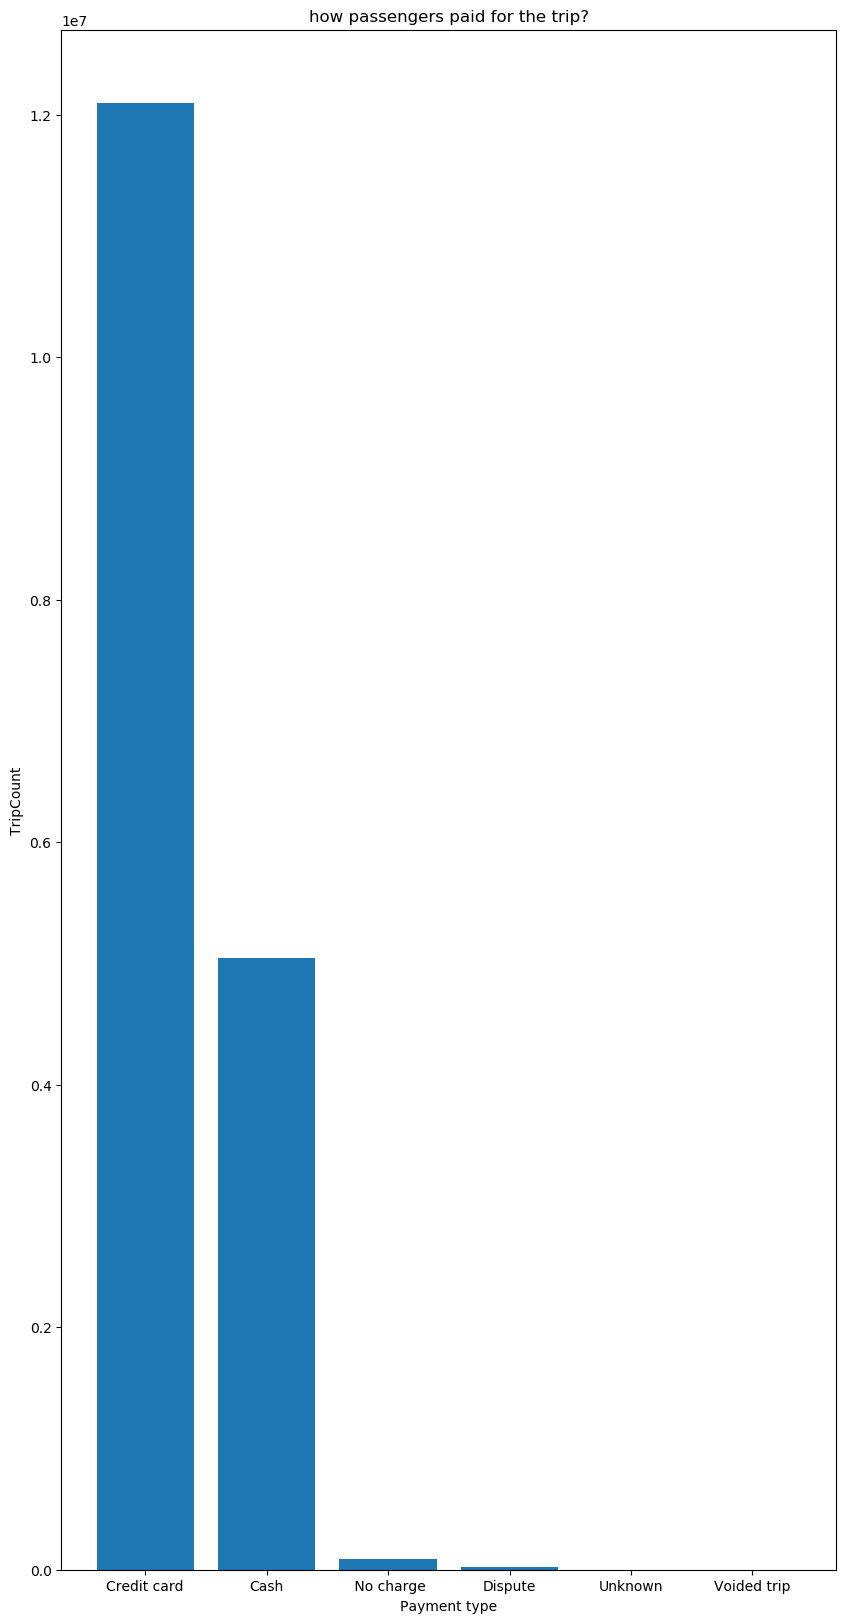

In [149]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10,20))
objects = df_payment_types['payment_type']
y_pos = np.arange(len(objects))
x_pos = df_payment_types['Tripcount']
 
plt.bar(y_pos, x_pos, align='center', alpha=1.0)
plt.xticks(y_pos, objects)
plt.ylabel('TripCount')
plt.xlabel('Payment type')

plt.title('how passengers paid for the trip?')
 
plt.show()

Pie Graph ....


<p style="font-size:2em; font-size:1.5em;color:black; font-style:bold">Part 5:Distribution of the number passengers follow days of week</p>

In [13]:
df_pickup_weekday = pd.read_sql_query('SELECT pickup_weekday, count(*) AS PUcount \
                        FROM table_record \
                        GROUP BY pickup_weekday', nyc_database)

In [14]:
df_pickup_weekday

,pickup_weekday,PUcount
0,Friday,2581401
1,Monday,2366563
2,Saturday,2464624
3,Sunday,2091027
4,Thursday,2401745
5,Tuesday,2599891
6,Wednesday,2746699


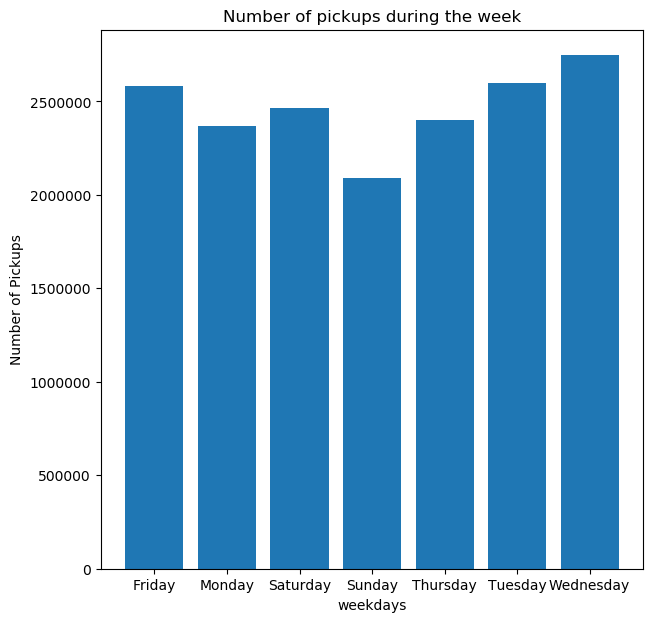

In [151]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
objects = df_pickup_weekday['pickup_weekday']
y_pos = np.arange(len(objects))
x_pos = df_pickup_weekday['PUcount']
 
plt.bar(y_pos, x_pos, align='center', alpha=1.0)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Pickups')
plt.xlabel('weekdays')

plt.title('Number of pickups during the week')
 
plt.show()

<p style="font-size:2em; font-size:1.5em;color:black; font-style:bold">Part 6: Distribution of trip distance for taking a taxi?</p>

To answer this question, we should define what short and long distance trips are at first.

### - Define short and long distance

To get a closer look at the distribution of trip distance, we select the trip_distance column values and print out its summary statistics.

In [152]:
df_dist = pd.read_sql_query('SELECT trip_distance FROM table_record', nyc_database)

In [167]:
df_dist['trip_distance'].describe()

count    1.725195e+07
mean     2.787259e+00
std      4.576141e+01
min      0.000000e+00
25%      9.200000e-01
50%      1.560000e+00
75%      2.860000e+00
max      1.894838e+05
Name: trip_distance, dtype: float64

In [154]:
df_dist.shape

(17251950, 1)

In [162]:
df_dist.count()

trip_distance    17251950
dtype: int64

In [161]:
df_dist.mean()

trip_distance    2.787259
dtype: float64

In [160]:
df_dist.max()

trip_distance    189483.84
dtype: float64

In [159]:
df_dist.min()

trip_distance    0.0
dtype: float64

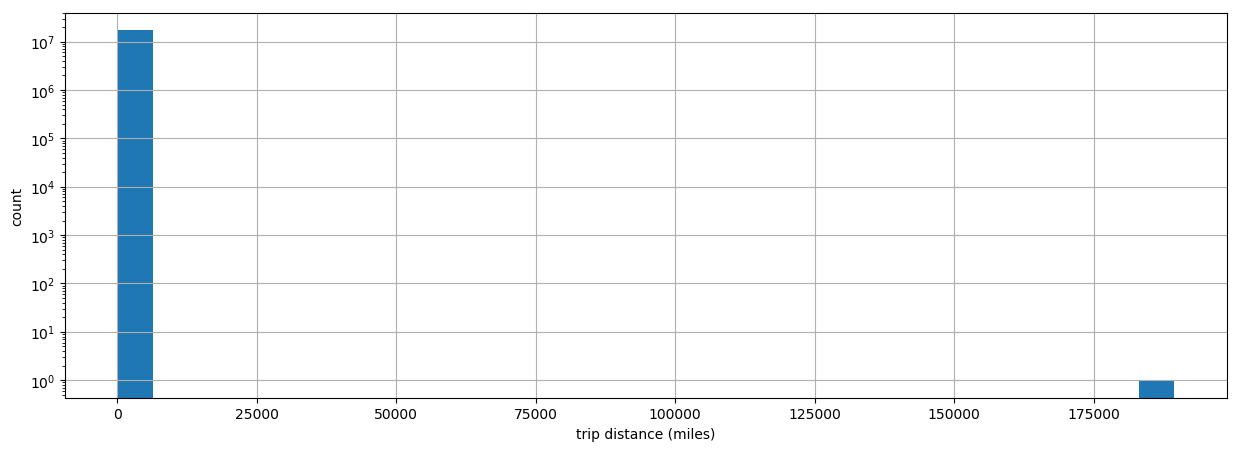

In [163]:
ax = df_dist['trip_distance'].hist(bins=30, figsize=(15,5))
ax.set_yscale('log')
ax.set_xlabel("trip distance (miles)")
ax.set_ylabel("count")
plt.show()

According to the dustribution of trip distances and the fact that it takes about 30 miles to drive across the whole New York City, we decided to use 30 as the number to split the trips into short or long distance trips.

In [164]:
df_q3_short = pd.read_sql_query('SELECT count(*) AS count FROM table_record \
                                 WHERE trip_distance < 30', nyc_database)

In [165]:
df_q3_long = pd.read_sql_query('SELECT count(*) AS count FROM table_record \
                                WHERE trip_distance >= 30 ', nyc_database)

In [166]:
print("Short Trips: {} records in total.\nLong Trips: {} records in total."\
     .format(df_q3_short.values[0][0], df_q3_long.values[0][0]))

Short Trips: 17245753 records in total.
Long Trips: 6197 records in total.


Instinctly, we think that the pickup/dropoff time may be different for short trips and long trips since the purpose for short trips is not the same as that of long trips.

To validate our assumption, we first select temporal information from our database.

In [7]:
df_q3_short = pd.read_sql_query('SELECT pickup_hour AS PUtime, \
                                 dropoff_hour AS DOtime, count(*) AS count \
                                 FROM table_record \
                                 WHERE trip_distance < 30 \
                                 GROUP BY pickup_hour, dropoff_hour', nyc_database)

In [8]:
df_q3_short.shape

(307, 3)

In [10]:
df_q3_short

,PUtime,DOtime,count
0,00,00,422725
1,00,01,88707
2,00,02,68
3,00,03,2
4,00,04,1
5,00,05,1
6,00,08,2
7,00,09,1
8,00,11,2
9,00,12,2


In [22]:
test = pd.read_sql_query('SELECT pickup_hour AS PUtime, tpep_pickup_datetime,tpep_dropoff_datetime, \
                                 dropoff_hour AS DOtime, count(*) AS count \
                                 FROM table_record \
                                 WHERE trip_distance < 30\
                                 AND pickup_hour=23\
                                 AND dropoff_hour=23\
                                  GROUP BY pickup_hour, dropoff_hour', nyc_database)

In [21]:
test.shape

(1, 5)

In [169]:
df_q3_long = pd.read_sql_query('SELECT pickup_hour AS PUtime, \
                                 dropoff_hour AS DOtime, count(*) AS count \
                                 FROM table_record \
                                 WHERE trip_distance >= 30 \
                                 GROUP BY pickup_hour, dropoff_hour', nyc_database)

In [172]:
df_q3_long.shape

(165, 3)

In [174]:
df_q3_long.head()

,PUtime,DOtime,count
0,00,00,51
1,00,01,204
2,00,02,18
3,00,04,3
4,00,22,1


Afterwards, we visualize the pickup/dropoff counts at each time for both short trips and long trips.

In [175]:
df_q3 = df_q3_short.merge(df_q3_long, on=["PUtime", "DOtime"], suffixes=["_short", "_long"]) \
                        .rename(columns={"count_short":"short trips", "count_long":"long trips", \
                                        "PUtime":"pickup time", "DOtime":"dropoff time"})

In [182]:
df_q3.shape

(142, 4)

In [183]:
df_q3.head()

,pickup time,dropoff time,short trips,long trips
0,00,00,422725,51
1,00,01,88707,204
2,00,02,68,18
3,00,04,1,3
4,00,22,19,1


In [176]:
df_q3_PU = df_q3.groupby(["pickup time"], as_index=False) \
            .agg({'short trips': 'sum', 'long trips':'sum'}) \
            .sort_values(by="pickup time")

In [184]:
df_q3_PU.shape

(24, 3)

In [185]:
df_q3_PU.head()

,pickup time,short trips,long trips
0,00,511520,277
1,01,362153,158
2,02,268842,135
3,03,193848,85
4,04,150741,92


In [177]:
df_q3_DO = df_q3.groupby(["dropoff time"], as_index=False) \
            .agg({'short trips': 'sum', 'long trips':'sum'}) \
            .sort_values(by="dropoff time")

In [186]:
df_q3_DO.shape

(24, 3)

In [187]:
df_q3_DO.head()

,dropoff time,short trips,long trips
0,00,551692,271
1,01,390015,257
2,02,286294,157
3,03,203392,118
4,04,160959,107


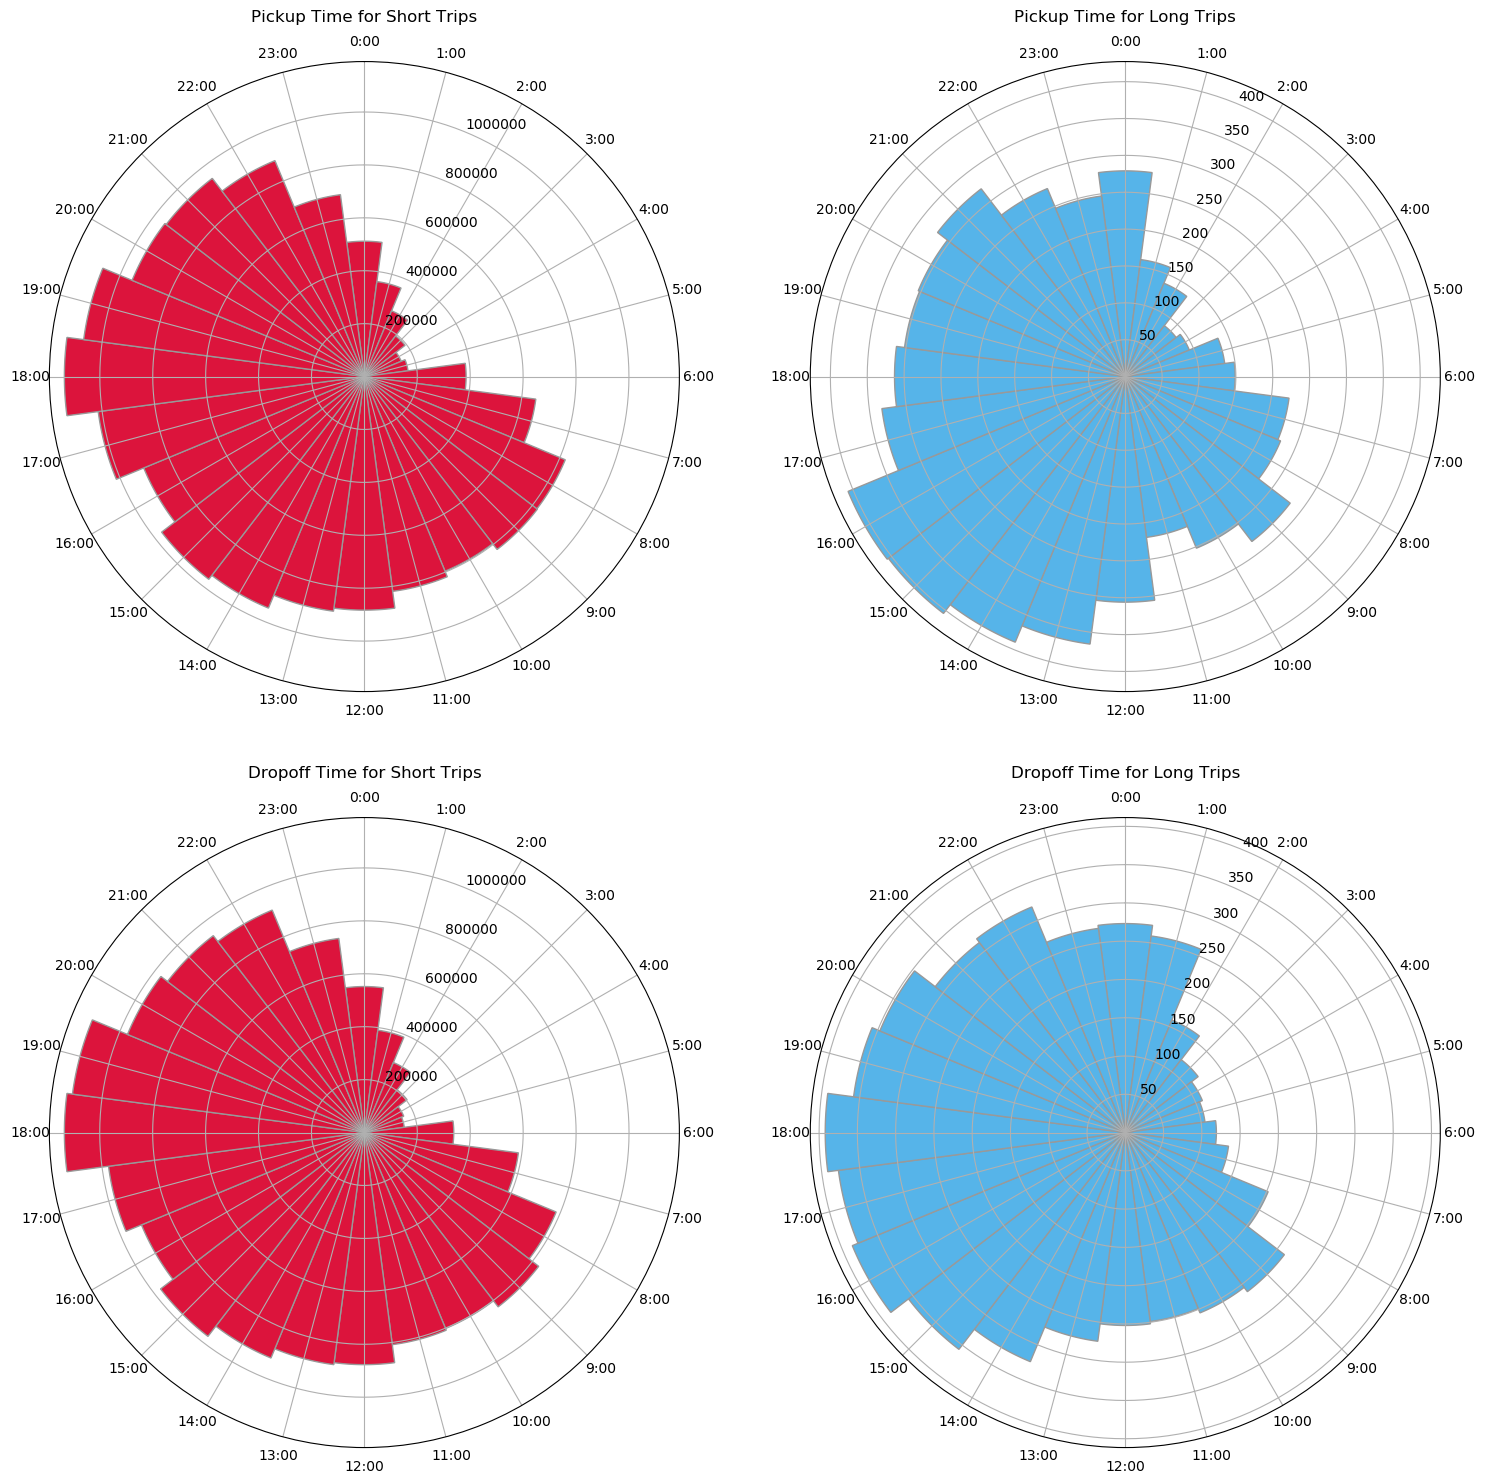

In [178]:
diff_short_long_trip_on_time()

### Based on the figure shown above, we can observe that:

#### For short trips:

the peak hours of pickups are from 5 PM to 7 PM.
the peak hours of dropoffs are also from 6 PM to 7 PM.

#### For long trips ( > 30 miles):

the peak hours of pickups are from 1 PM to 4 PM.
the peak hours of dropoffs are from 3 PM to 8 PM.

#### The off-peak hours are similar for both short trips and long trips.

#### With these observations, it can be guesed that:

Short trips are mainly contributed by people having dinner and hanging out at night.
Long trips ( > 30 miles) are contributed by travelers taking an arrival or a departure.

### - The Difference in Spatial Attributes

So let’s examine if our guesses are correct by summarize the spatial attributes of short trips and long trips.

Here we extract pickup/dropoff locations and their counts from database by grouping the counts by each ('pickup zone', 'dropoff zone') pair.

In [23]:
from sqlalchemy import create_engine

nyc_database = create_engine('sqlite:///nyc_database.db')

In [24]:
import sqlite3
con = sqlite3.connect('C:\\Users\\Bahman\\Traffic Data - LUH\\nyc_database.db')
con.close()

In [ ]:
df_q3_short = pd.read_sql_query('SELECT * \
                                 FROM table_record \
                                 WHERE trip_distance < 2.78', nyc_database)


In [26]:
df_q3_short.shape

(7545, 3)

In [27]:
df_q3_long = pd.read_sql_query('SELECT *\
                                 FROM table_record \
                                 WHERE trip_distance >= 2.78', nyc_database)

In [28]:
df_q3_long.shape

(28220, 3)

In [11]:
df_q3_short.head()

,PULocationID,DOLocationID,count
0,1,1,1003
1,1,13,1
2,1,50,1
3,1,90,2
4,1,100,1


In [12]:
df_q3_short.shape

(29028, 3)

In [13]:
df_q3_long.head()

,PULocationID,DOLocationID,count
0,1,1,3
1,1,132,2
2,1,138,2
3,1,231,1
4,1,265,1


In [14]:
df_q3_long.shape

(823, 3)

After extracting data from database, we then arrange the information and show the top 3 ('pickup zone', 'dropoff zone') pair for both short trips and long trips.

In [193]:
df_q3 = df_q3_short.merge(df_q3_long, on=["PULocationID", "DOLocationID"], suffixes=["_short", "_long"]) \
                        .rename(columns={"count_short":"short trips", "count_long":"long trips"})
df_q3 = df_q3.merge(df_loc[["LocationID", "zone"]], left_on="PULocationID", right_on="LocationID") \
             .drop(['LocationID'], axis=1).rename(columns={"zone":"pickup zone"}) \
             .merge(df_loc[["LocationID", "zone"]], left_on="DOLocationID", right_on="LocationID") \
             .drop(['LocationID'], axis=1).rename(columns={"zone":"dropoff zone"})

In [196]:
df_q3.shape

(608, 6)

In [199]:
df_q3.head()

,PULocationID,DOLocationID,short trips,long trips,pickup zone,dropoff zone
0,1,1,1003,3,Newark Airport,Newark Airport
1,7,1,2,4,Astoria,Newark Airport
2,14,1,2,1,Bay Ridge,Newark Airport
3,24,1,53,1,Bloomingdale,Newark Airport
4,28,1,4,1,Briarwood/Jamaica Hills,Newark Airport


In the tables below, we can see that

The top 3 routes for short trips are all in the most prosperous area in Manhattan, which are filled with restaurants and entertainment venues.

The top 3 routes for long trips ( > 30 miles) are routes that drive from one airport zone to another.

The second popular route is a special case that passengers are picked up from and also dropped-off at JFK Airport, which may be some kind of city tours of the tranfer during their waiting time between the connecting flights.

These findings support our guesses that long trips are for traveling and that short trips are for eating and entertaining.

In [201]:
ShortTrip_top3 = df_q3.sort_values(by="short trips", ascending=False).head(3)
ShortTrip_top3[['pickup zone', 'dropoff zone', 'short trips']]

,pickup zone,dropoff zone,short trips
539,Upper East Side South,Upper East Side South,79868
543,Upper West Side North,Upper West Side South,45098
483,Upper East Side South,Midtown East,42960


In [202]:
LongTrip_top3 = df_q3.sort_values(by="long trips", ascending=False).head(3)
LongTrip_top3[['pickup zone', 'dropoff zone', 'long trips']]

,pickup zone,dropoff zone,long trips
12,JFK Airport,Newark Airport,454
91,JFK Airport,JFK Airport,182
14,LaGuardia Airport,Newark Airport,121


On the other hand, we can also observe the popular zones for short and long trips on map. By aggregating the pickup/dropoff trip count of each zone, we then show the popular pickup/drop-off zones for short trips and long trips.

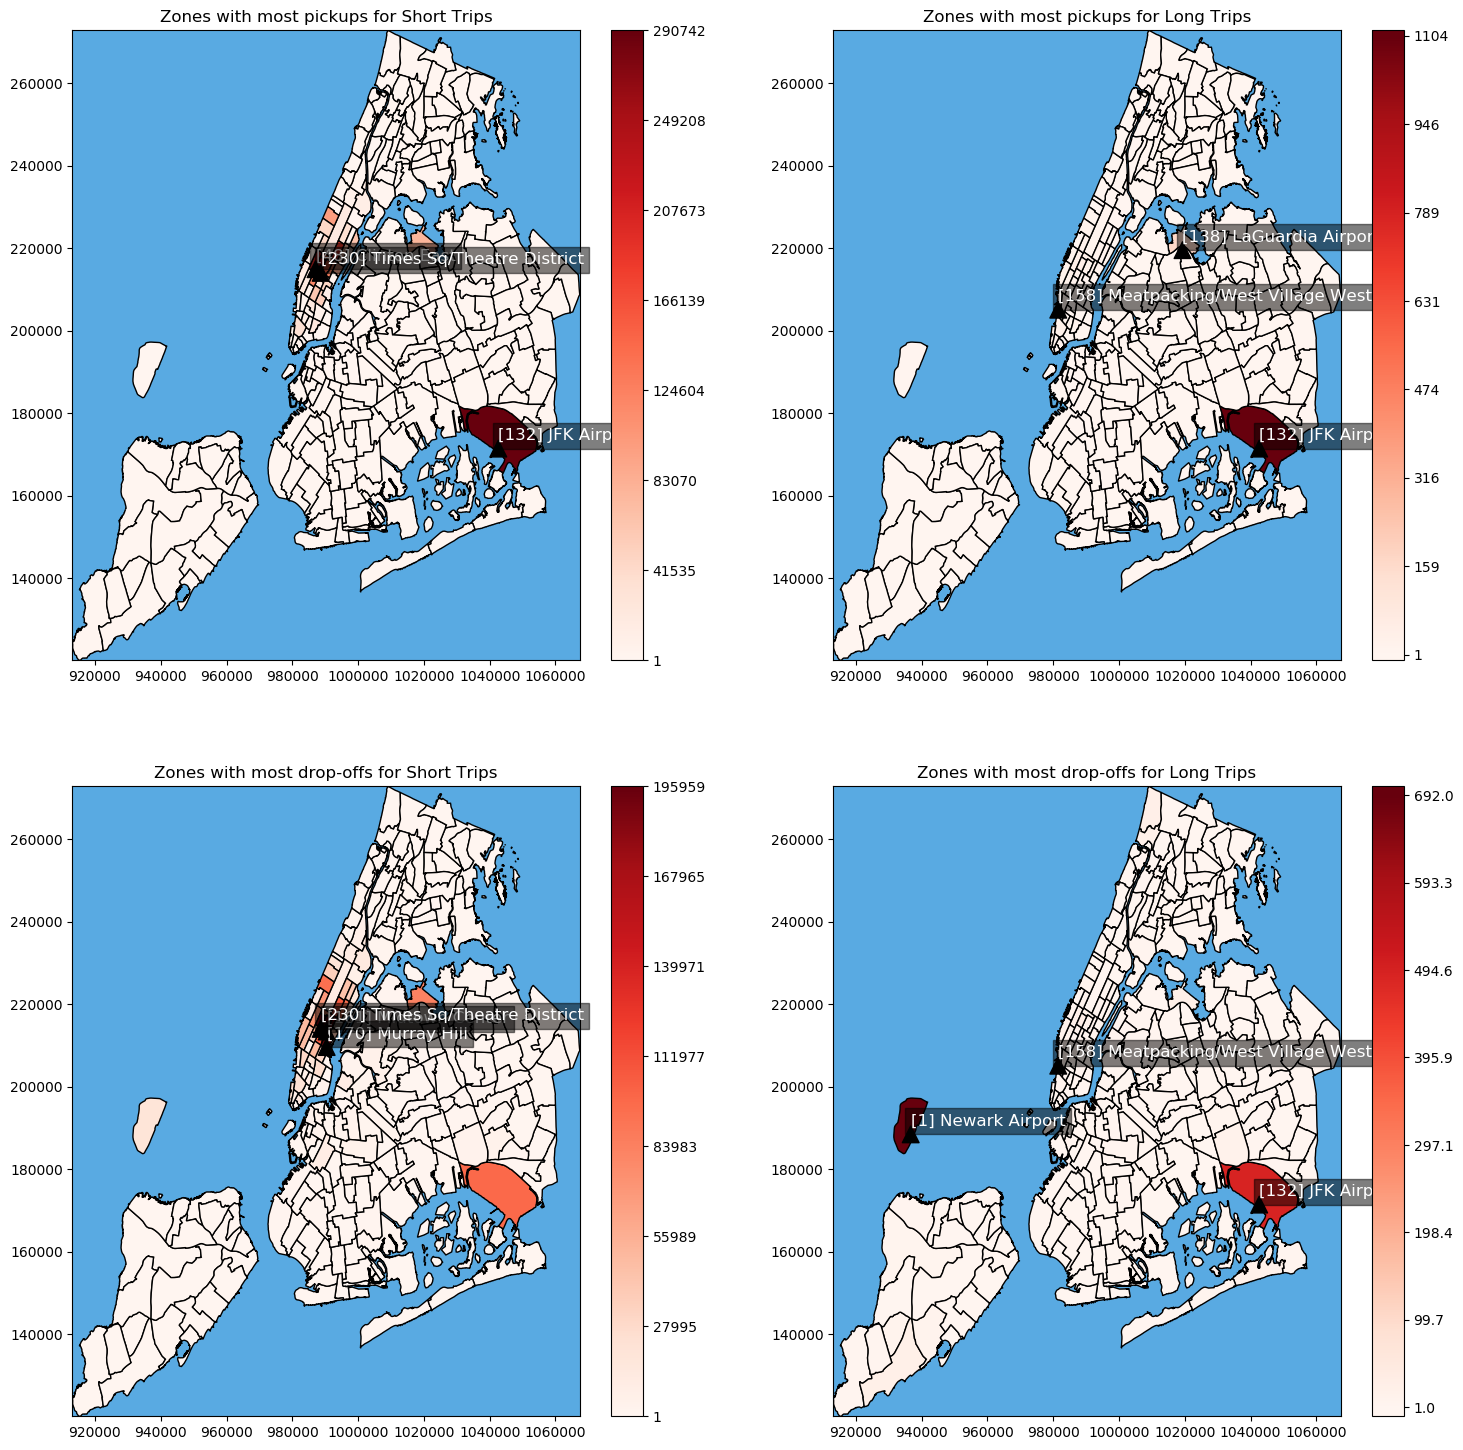

In [203]:
df_q3_PU = df_q3.groupby("PULocationID", as_index=False).agg({'short trips':'sum', 'long trips':'sum'})
PUtop3_short = df_q3_PU.sort_values(by=['short trips'], ascending=False).set_index("PULocationID").head(3)
PUtop3_long = df_q3_PU.sort_values(by=['long trips'], ascending=False).set_index("PULocationID").head(3)
PUcount_short = dict(zip(df_q3_PU['PULocationID'].tolist(), df_q3_PU['short trips'].tolist()))
PUcount_long = dict(zip(df_q3_PU['PULocationID'].tolist(), df_q3_PU['long trips'].tolist()))

df_q3_DO = df_q3.groupby("DOLocationID", as_index=False).agg({'short trips':'sum', 'long trips':'sum'})
DOtop3_short = df_q3_DO.sort_values(by=['short trips'], ascending=False).set_index("DOLocationID").head(3)
DOtop3_long = df_q3_DO.sort_values(by=['long trips'], ascending=False).set_index("DOLocationID").head(3)
DOcount_short = dict(zip(df_q3_DO['DOLocationID'].tolist(), df_q3_DO['short trips'].tolist()))
DOcount_long = dict(zip(df_q3_DO['DOLocationID'].tolist(), df_q3_DO['long trips'].tolist()))

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,18))
ax = plt.subplot(2, 2, 1)
ax.set_title("Zones with most pickups for Short Trips")
draw_zone_map(ax, sf, heat=PUcount_short, text=PUtop3_short.index.tolist())
ax = plt.subplot(2, 2, 2)
ax.set_title("Zones with most pickups for Long Trips")
draw_zone_map(ax, sf, heat=PUcount_long, text=PUtop3_long.index.tolist())
ax = plt.subplot(2, 2, 3)
ax.set_title("Zones with most drop-offs for Short Trips")
draw_zone_map(ax, sf, heat=DOcount_short, text=DOtop3_short.index.tolist())
ax = plt.subplot(2, 2, 4)
ax.set_title("Zones with most drop-offs for Long Trips")
draw_zone_map(ax, sf, heat=DOcount_long, text=DOtop3_long.index.tolist())

### From the figure above, we can find something interesting:

##### 1. Surprisingly, JFK Airport is the most popular pickup zone for short trips.
More specifically, in 2 months there are about ... million taxis taken from JFK Airport (about ... trips per day) and drive no more than 30 miles to arrive their destination.

These passengers may contain foreign travelers or locals who just came back from abroad.

#### 2. There are more drop-offs at JFK Airport than Newark Airport in short trips.
#### 3. There are more drop-offs at Newark Airport than JFK Airport in long trips.
#### 4. For long trips, JFK Airport and LaGuardia Airport are the most popular pickup zones.

### - Lastly, we compare short trips and long trips in some other aspects.



C:\Users\Bahman\Anaconda33\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


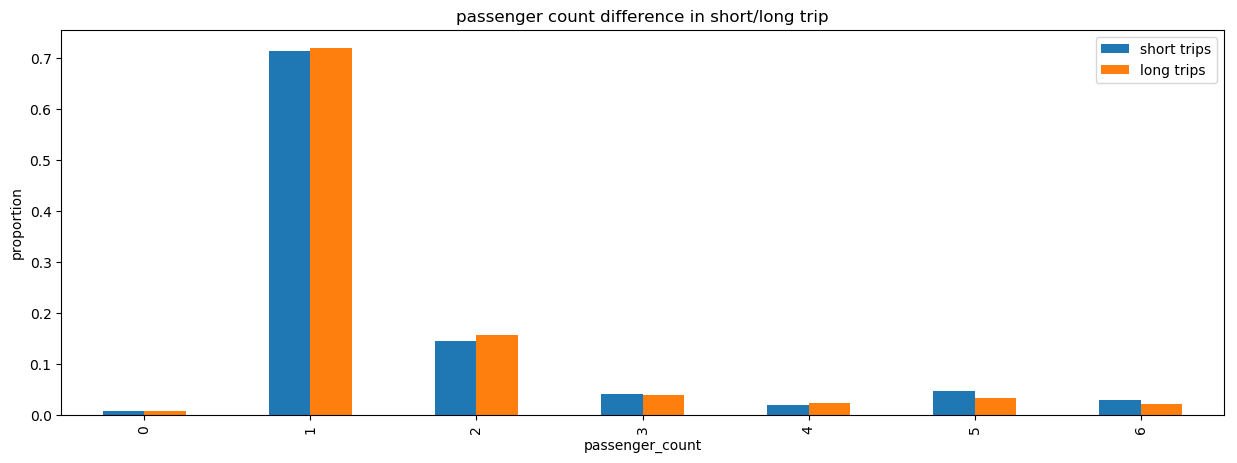

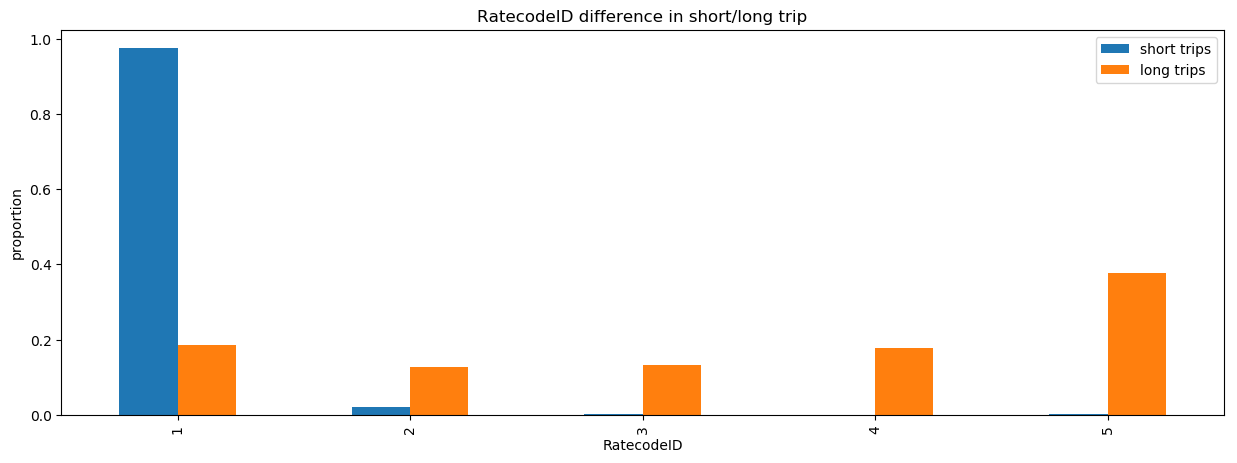

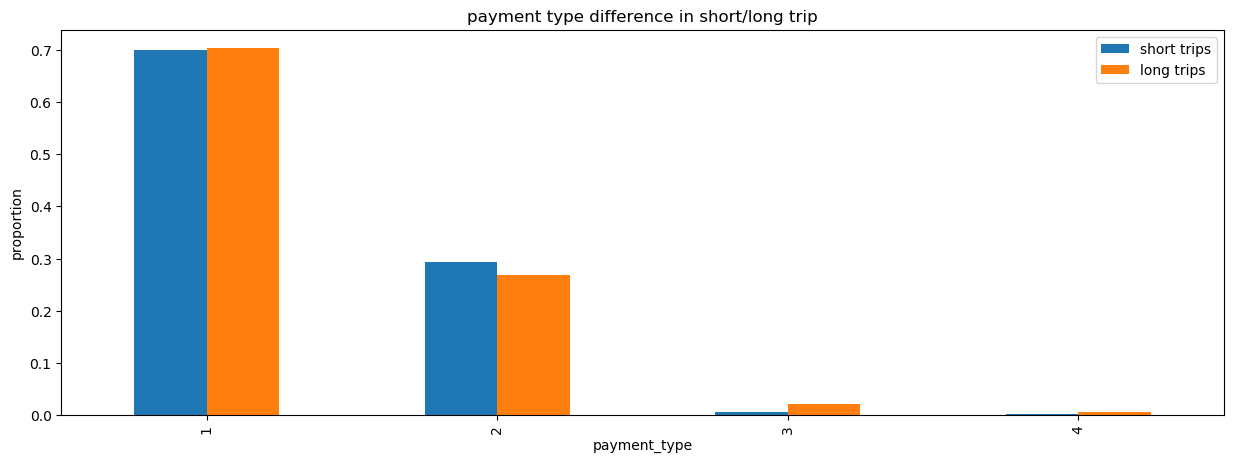

In [204]:
for attr in ["passenger_count", "RatecodeID", "payment_type"]:
    diff_short_long_trip_on(attr, rpr="proportion", kind='bar')

Unexpectedly, the distribution of passenger count is nearly the same for short trips and long trips.



RateCodeID represents the final rate code in effect at the end of the trip:

1=Standard rate

2=JFK

3=Newark

4=Nassau or Westchester

5=Negotiated fare

6=Group ride

It can be seen that 40 percent of long trips use Negotiated fare and another 40 percent of long trips use JFK, Newark, or Nassau or Westchester while less than 5 percent of short trips use any of them.

payment_type is a numeric code signifying how the passenger paid for the trip:

1=Credit card

2=Cash

3=No charge

4=Dispute

Passengers of long trips paid a little more frequent in credit card and a little less frequent in cash comparing to that of short trips.
